## Importing the libaries

In [1]:
#importing libaries
import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy
from keras.applications.vgg16 import VGG16

#setting seed for reproducability
from numpy.random import seed
seed(25)
tf.random.set_seed(50)

## 2.2 Downloading the images

In [2]:
# 0 - Normal
# 1 - Tumor

data = [] #creating a list for images
paths = [] #creating a list for paths
labels = [] #creating a list to put our 0 or 1 labels

#staring with the images that have tumors
for r, d, f in os.walk(r'C:\\Users\\akilesh\\BrainTumor prediction\BrainT/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

#now working with the images with no tumors        
paths = []
for r, d, f in os.walk(r"C:\\Users\\akilesh\\BrainTumor prediction\BrainT/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)
        
data = np.array(data)
data.shape

labels = np.array(labels)
labels = labels.reshape(139,1)

print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

data shape is: (139, 128, 128, 3)
labels shape is: (139, 1)


# 3. Processing the images

In [3]:
#we have 139 images with 128 height, 128 weight, RGB color channel
print(data.shape)

(139, 128, 128, 3)


## 3.1 Changing pixel values

Each pixel has a value between 255 and 0. We will reduce this down to 1 and 0 in order to help the neural network converge quicker.

In [4]:
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

255
0


In [5]:
#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

1.0
0.0


## 3.2 Visualizing the images

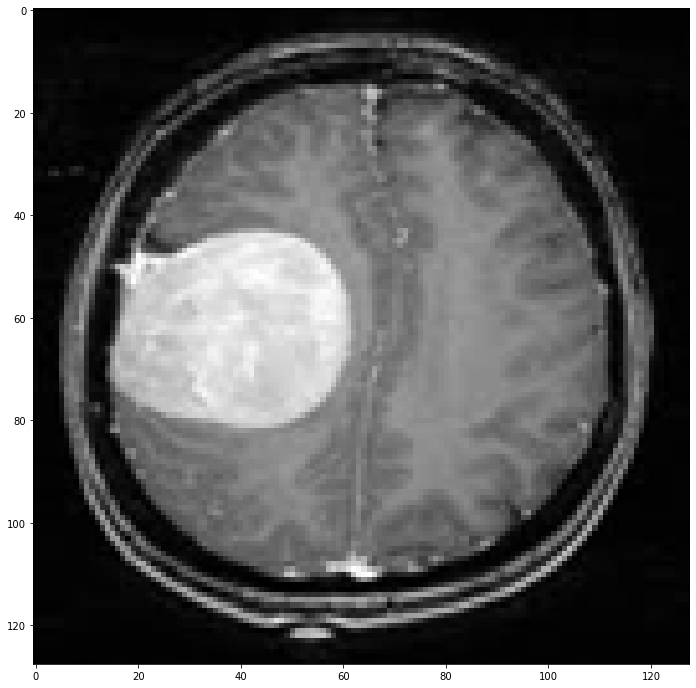

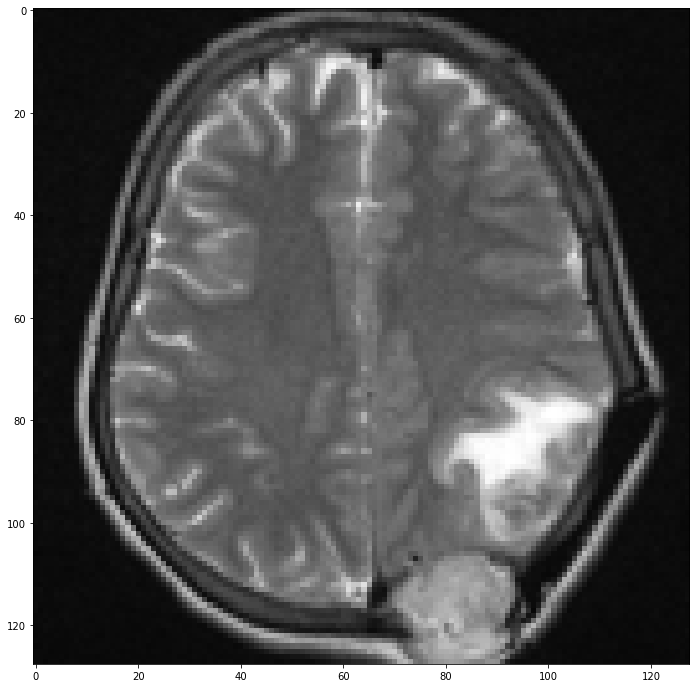

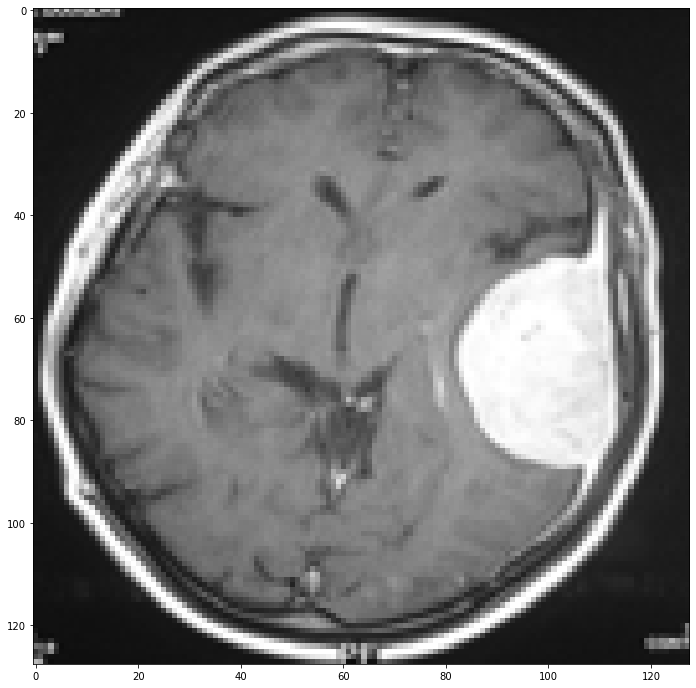

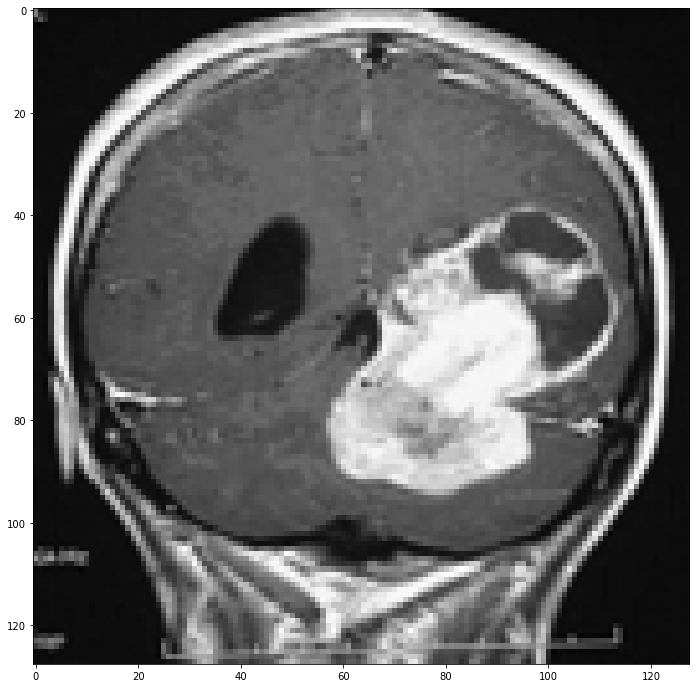

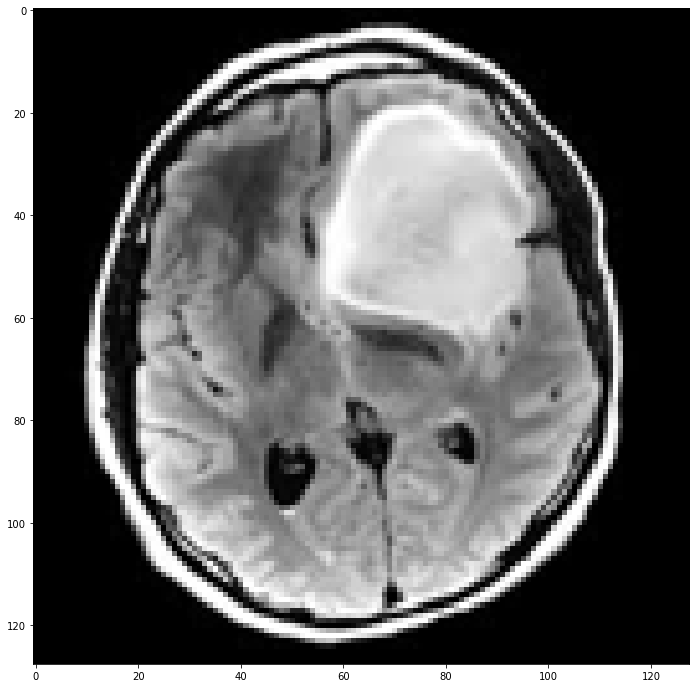

In [6]:
for i in range(5):
    fig = plt.figure(figsize=(70,70))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

# 4 Model

## 4.1 Creating training and test sets

Before we create our model we will split up the data into traing sets and test sets with 70% going to training and 30% going to testing.

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)

In [8]:
print("shape of our training data:",x_train.shape)
print("shape of our training labels:",y_train.shape)
print("shape of our test data:",x_test.shape)
print("shape of our test labels:",y_test.shape)

shape of our training data: (97, 128, 128, 3)
shape of our training labels: (97, 1)
shape of our test data: (42, 128, 128, 3)
shape of our test labels: (42, 1)


## 4.2 Creating our baseline model

We will start with creating a sequential model set up for binary classification using the keras libary.

In [9]:
model = keras.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [11]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=100,
    verbose=(2),
)

Epoch 1/100
2/2 - 3s - loss: 0.6899 - accuracy: 0.5567 - val_loss: 0.6957 - val_accuracy: 0.4286 - 3s/epoch - 1s/step
Epoch 2/100
2/2 - 2s - loss: 0.6889 - accuracy: 0.5361 - val_loss: 0.6959 - val_accuracy: 0.4286 - 2s/epoch - 887ms/step
Epoch 3/100
2/2 - 2s - loss: 0.6893 - accuracy: 0.5361 - val_loss: 0.6961 - val_accuracy: 0.4286 - 2s/epoch - 872ms/step
Epoch 4/100
2/2 - 2s - loss: 0.6868 - accuracy: 0.5464 - val_loss: 0.6965 - val_accuracy: 0.4286 - 2s/epoch - 802ms/step
Epoch 5/100
2/2 - 2s - loss: 0.6839 - accuracy: 0.5361 - val_loss: 0.6970 - val_accuracy: 0.4286 - 2s/epoch - 827ms/step
Epoch 6/100
2/2 - 2s - loss: 0.6830 - accuracy: 0.5361 - val_loss: 0.6977 - val_accuracy: 0.4286 - 2s/epoch - 808ms/step
Epoch 7/100
2/2 - 2s - loss: 0.6821 - accuracy: 0.5361 - val_loss: 0.6984 - val_accuracy: 0.4286 - 2s/epoch - 799ms/step
Epoch 8/100
2/2 - 2s - loss: 0.6806 - accuracy: 0.5361 - val_loss: 0.6992 - val_accuracy: 0.4286 - 2s/epoch - 840ms/step
Epoch 9/100
2/2 - 2s - loss: 0.6764

Epoch 70/100
2/2 - 2s - loss: 0.4422 - accuracy: 0.7629 - val_loss: 0.7546 - val_accuracy: 0.5952 - 2s/epoch - 897ms/step
Epoch 71/100
2/2 - 2s - loss: 0.4417 - accuracy: 0.7835 - val_loss: 0.7331 - val_accuracy: 0.5952 - 2s/epoch - 973ms/step
Epoch 72/100
2/2 - 2s - loss: 0.4328 - accuracy: 0.7835 - val_loss: 0.7385 - val_accuracy: 0.5714 - 2s/epoch - 1s/step
Epoch 73/100
2/2 - 2s - loss: 0.4403 - accuracy: 0.7629 - val_loss: 0.7500 - val_accuracy: 0.5714 - 2s/epoch - 1s/step
Epoch 74/100
2/2 - 2s - loss: 0.4272 - accuracy: 0.7629 - val_loss: 0.7398 - val_accuracy: 0.5952 - 2s/epoch - 1s/step
Epoch 75/100
2/2 - 3s - loss: 0.3949 - accuracy: 0.8041 - val_loss: 0.7431 - val_accuracy: 0.5476 - 3s/epoch - 1s/step
Epoch 76/100
2/2 - 3s - loss: 0.4093 - accuracy: 0.7938 - val_loss: 0.7280 - val_accuracy: 0.6190 - 3s/epoch - 1s/step
Epoch 77/100
2/2 - 3s - loss: 0.4010 - accuracy: 0.8144 - val_loss: 0.7234 - val_accuracy: 0.6190 - 3s/epoch - 1s/step
Epoch 78/100
2/2 - 3s - loss: 0.3987 - acc

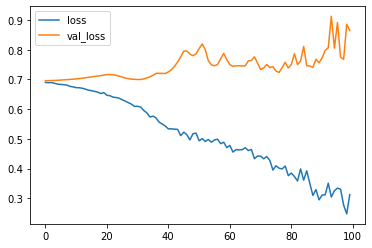

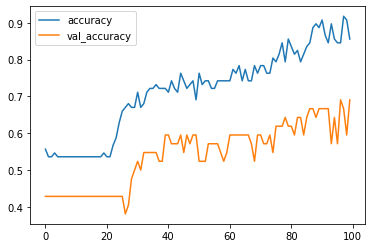

In [12]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [13]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
     
pred = pred.astype(int)

In [15]:
#creating a classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        24
           1       0.69      0.50      0.58        18

    accuracy                           0.69        42
   macro avg       0.69      0.67      0.67        42
weighted avg       0.69      0.69      0.68        42



## 4.3 Adding data agumentation

Here we will add a technique called data agumentation. We will be adding a layer that flips our images horizontaly creating more data for our model to train on.

In [16]:
model = keras.Sequential([
    
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

In [18]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=100,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/100
2/2 - 5s - loss: 0.6984 - accuracy: 0.4845 - val_loss: 0.6928 - val_accuracy: 0.5476 - 5s/epoch - 3s/step
Epoch 2/100
2/2 - 4s - loss: 0.6955 - accuracy: 0.5361 - val_loss: 0.6937 - val_accuracy: 0.4762 - 4s/epoch - 2s/step
Epoch 3/100
2/2 - 5s - loss: 0.6941 - accuracy: 0.4948 - val_loss: 0.6953 - val_accuracy: 0.4048 - 5s/epoch - 2s/step
Epoch 4/100
2/2 - 4s - loss: 0.6854 - accuracy: 0.5567 - val_loss: 0.6978 - val_accuracy: 0.4286 - 4s/epoch - 2s/step
Epoch 5/100
2/2 - 2s - loss: 0.6865 - accuracy: 0.5258 - val_loss: 0.7011 - val_accuracy: 0.4286 - 2s/epoch - 966ms/step
Epoch 6/100
2/2 - 2s - loss: 0.6780 - accuracy: 0.5464 - val_loss: 0.7050 - val_accuracy: 0.4286 - 2s/epoch - 849ms/step
Epoch 7/100
2/2 - 2s - loss: 0.6686 - accuracy: 0.5464 - val_loss: 0.7096 - val_accuracy: 0.4286 - 2s/epoch - 868ms/step
Epoch 8/100
2/2 - 2s - loss: 0.6755 - accuracy: 0.5464 - val_loss: 0.7138 - val_accuracy: 0.4286 - 2s/epoch - 865ms/step
Epoch 9/100
2/2 - 2s - loss: 0.6675 - accura

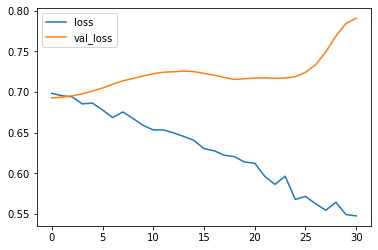

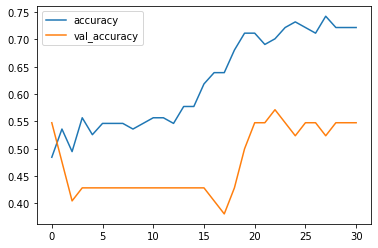

In [19]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [20]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

In [21]:
#creating a classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.92      0.70        24
           1       0.33      0.06      0.10        18

    accuracy                           0.55        42
   macro avg       0.45      0.49      0.40        42
weighted avg       0.47      0.55      0.44        42

